### Problem 1: The K Means Clustering Method
(a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from collections import Counter
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


np.random.seed(42)

def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b), axis=1)

def chebyshev_distance(a, b):
    return np.max(np.abs(a - b), axis=1)


iris = load_iris()
x = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


def k_means(x, K, distance_metric='euclidean', max_iters=100):
    centroids = x[np.random.choice(range(len(x)), K, replace=False)]
    
    for _ in range(max_iters):
        if distance_metric == 'euclidean':
            distances = np.array([euclidean_distance(x, centroid) for centroid in centroids])
        elif distance_metric == 'manhattan':
            distances = np.array([manhattan_distance(x, centroid) for centroid in centroids])
        elif distance_metric == 'chebyshev':
            distances = np.array([chebyshev_distance(x, centroid) for centroid in centroids])
        
        cluster_labels = np.argmin(distances, axis=0)
        
        new_centroids = np.array([x[cluster_labels == k].mean(axis=0) for k in range(K)])
        
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        
    return cluster_labels, centroids

<div style="page-break-after: always;"></div>
(b) & (c) combined

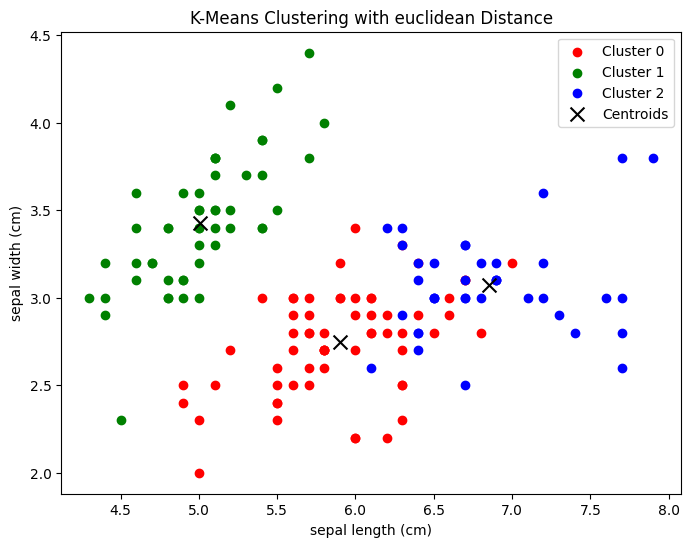

Accuracy with euclidean distance: 0.8933


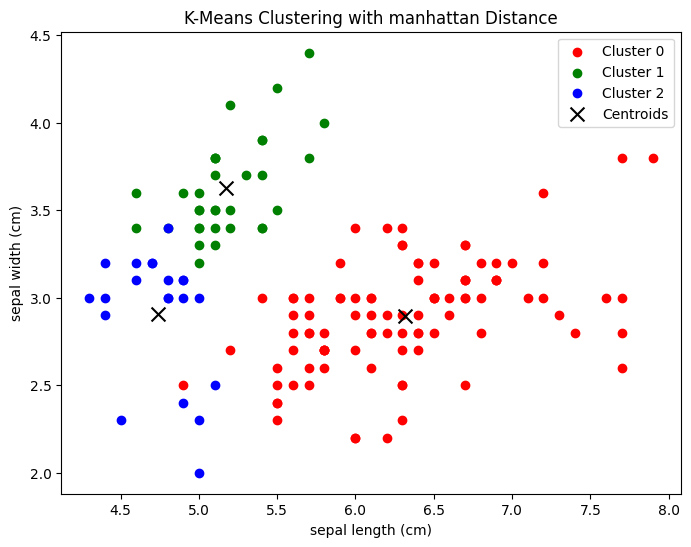

Accuracy with manhattan distance: 0.6667


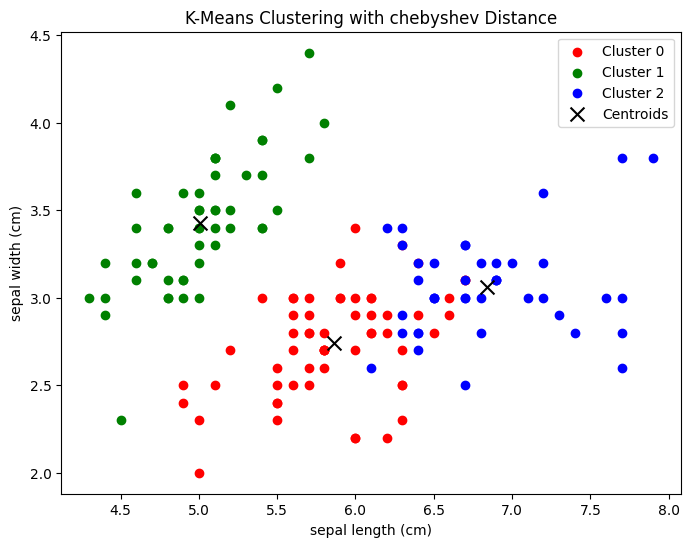

Accuracy with chebyshev distance: 0.8867


In [2]:
K = 3
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

for metric in distance_metrics:
    cluster_labels, centroids = k_means(x, K, distance_metric=metric)
    
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b']
    for k in range(K):
        cluster = x[cluster_labels == k]
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[k], label=f'Cluster {k}')
    
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='x', label='Centroids')
    plt.title(f'K-Means Clustering with {metric} Distance')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()
    
    label_mapping = {}
    for k in range(K):
        true_labels = y[cluster_labels == k]
        if len(true_labels) == 0:
            continue
        most_common = Counter(true_labels).most_common(1)[0][0]
        label_mapping[k] = most_common
    predicted_labels = np.array([label_mapping[label] for label in cluster_labels])
    accuracy = np.mean(predicted_labels == y)
    print(f'Accuracy with {metric} distance: {accuracy:.4f}')

<div style="page-break-after: always;"></div>

### Problem 2: The PCA Method

Explained variance ratio (first two components): [0.92461872 0.05306648]


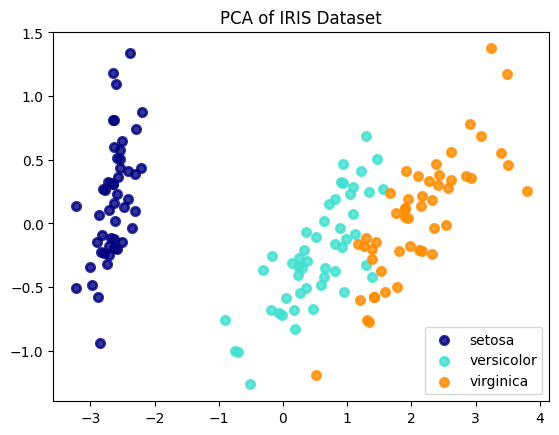

In [3]:
pca = PCA(n_components=2)
x_r = pca.fit_transform(x)

print("Explained variance ratio (first two components):", pca.explained_variance_ratio_)
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        x_r[y == i, 0],
        x_r[y == i, 1],
        color=color,
        alpha=0.8,
        lw=lw,
        label=target_name
    )
plt.legend()
plt.title("PCA of IRIS Dataset")
plt.show()